# Phase 1
Analysing AML microarray.

## 1. Prepairing Data

### Installing Packages

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.5
Uninstalling rpy2-3.5.5:
  Successfully uninstalled rpy2-3.5.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 8.4 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310206 sha256=48a80abc3e2bc32f2cb2570fb5376ea29373bba52d49e5568d2149c2920b321f
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2


In [ ]:
%%R
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos='http://cran.us.r-project.org')
BiocManager::install()
BiocManager::install("GEOquery")

install.packages("limma")
install.packages("umap")
install.packages("maptools")
install.packages("corrplot")
install.packages("pheatmap")
install.packages("reshape2")
install.packages("mvtnorm")
install.packages("Rtsne")
install.packages("M3C")
install.packages("MASS")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’

'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


  r83330)








	‘/tmp/Rtmp79wZ3W/downloaded_packages’

  'jsonlite', 'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr',
  'testthat', 'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'



Update all/some/none? [a/s/n]: n


'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


  r83330)








































	‘/tmp/Rtmp79wZ3W/downloaded_packages’

  'jsonlite', 'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr',
  'testthat', 'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'



Update all/some/none? [a/s/n]: n


(as ‘lib’ is unspecified)

(as ‘lib’ is unspecified)












































	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’

(as ‘lib’ is unspecified)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp79wZ3W/downloaded_packages’



### Libraries

In [ ]:
%%R

library(Biobase)
library(GEOquery)
library(limma)
library(umap)
library(maptools)
library(tidyr)
library(dplyr)
library(ggplot2)
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)
library(data.table)
library(corrplot)
library(pheatmap)
library(reshape2)
library(plyr)
library(MASS)
library(mvtnorm)


Attaching package: ‘BiocGenerics’



    IQR, mad, sd, var, xtabs



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




Attaching package: ‘limma’



    plotMA





    consider that it could be called from a Python process. This
    results in a quasi-obligatory segfault when rpy2 is evaluating
    R code using it. On the hand, rpy2 is accounting for the
    fact that it might already be running embedded in a Python
    process. This is why:
    - Python -> rpy2 -> R -> reticulate: crashes
    - R -> reticulate -> Python -> rpy2: works

    The issue with reticulate is tracked here:
    https://github.com/rstudio/reticulate/issues/208
    


Please note that 'maptools' will be retired during 2023,
plan transition at your earliest convenience;
some functionality will be moved to 'sp'.
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

Attaching package: ‘dplyr’



    combine



    combine, intersect, setdiff, union



    filter, lag



    intersect, setdiff, setequal, union






These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                          
2: CRAN packages only           
3: None                         
4: vctrs (0.5.0 -> 0.5.1) [CRAN]

Enter one or more numbers, or an empty line to skip updates: n
Enter one or more numbers, or an empty line to skip updates: 
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp79wZ3W/remotes4b58815693/vqv-ggbiplot-7325e88/DESCRIPTION’ ... OK
* preparing ‘ggbiplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ggbiplot_0.55.tar.gz’



(as ‘lib’ is unspecified)



If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)


Attaching package: ‘plyr’



    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize





Attaching package: ‘data.table’



    between, first, last



Attaching package: ‘reshape2’



    dcast, melt



    smiths


Attaching package: ‘MASS’



    select




### Loading Data

In [ ]:
%%R

gds <- getGEO("GSE48558", GSEMatrix = TRUE, AnnotGPL=TRUE)
show(gds)
gds48558 <- gds[[1]]

fvarLabels(gds48558) <- make.names(fvarLabels(gds48558))

# group membership for all samples
gsms <- paste0("1111111111111XXXXXXXXXXXXXXXXXXXXXXXXXXX0XXX0XXXXX",
               "XXXXXXXXXXXXXXXXXX0X0XXX0X0000X0XX00XX00X0X0X0X0X0",
               "XXX0XXX0XXXXXXXXXXXXXXXXXXXXXXXXXXXXX0000000110111",
               "00000000000000000000")
sml <- strsplit(gsms, split="")[[1]]

sel <- which(sml != "X")
sml <- sml[sel]
gds48558 <- gds48558[ ,sel]

gs <- factor(sml)
groups <- make.names(c("Healthy", "AML"))
levels(gs) <- groups
gds48558$group <- gs




/tmp/RtmpvjVBT7/GPL6244.annot.gz 



$GSE48558_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 32321 features, 170 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1180750 GSM1180751 ... GSM1180919 (170 total)
  varLabels: title geo_accession ... phenotype:ch1 (32 total)
  varMetadata: labelDescription
featureData
  featureNames: 7892501 7892502 ... 8180418 (32321 total)
  fvarLabels: ID Gene title ... GO:Component ID (21 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 23836560 
Annotation: GPL6244 



### Alternative
An alternative way to download data.

In [ ]:
!wget -c https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48558/soft/GSE48558_family.soft.gz
!wget -c https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48558/miniml/GSE48558_family.xml.tgz
!wget -c https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48558/matrix/GSE48558_series_matrix.txt.gz
!wget -c https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE48558&format=file

--2022-12-12 17:23:50--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48558/soft/GSE48558_family.soft.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 165.112.9.230, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49410493 (47M) [application/x-gzip]
Saving to: ‘GSE48558_family.soft.gz’

GSE48558_family.sof 100%[===================>]  47.12M  33.6MB/s    in 1.4s    

2022-12-12 17:23:52 (33.6 MB/s) - ‘GSE48558_family.soft.gz’ saved [49410493/49410493]

--2022-12-12 17:23:52--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE48nnn/GSE48558/miniml/GSE48558_family.xml.tgz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 165.112.9.230, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49166138 (

In [ ]:
%%R
gds858 <- getGEO(filename='GSE48558_series_matrix.txt.gz')

/tmp/RtmpvjVBT7/GPL6244.soft.gz 



### Data Properties

In [ ]:
%%R

expr <- exprs(gds48558)
features <- fData(gds48558)
phenotypes <- pData(gds48558)
dim(gds48558)

Features  Samples 
   32321       67 


In [ ]:
%%R

# Print column names of phenotypes and features
print(colnames(phenotypes))
print(colnames(features))

 [1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "growth_protocol_ch1"     "molecule_ch1"           
[13] "extract_protocol_ch1"    "label_ch1"              
[15] "label_protocol_ch1"      "taxid_ch1"              
[17] "hyb_protocol"            "scan_protocol"          
[19] "description"             "data_processing"        
[21] "platform_id"             "contact_name"           
[23] "contact_email"           "contact_institute"      
[25] "contact_address"         "contact_city"           
[27] "contact_zip/postal_code" "contact_country"        
[29] "supplementary_file"      "data_row_count"         
[31] "relation"                "phenotype:ch1"          
[33] "group"                  
 [1] "ID"                    "Gene.title"            "Gen

### Checking the Quality of Data

#### Normalizing the Data

In [ ]:
%%R
print(min(expr))
print(max(expr))

[1] 1.611473
[1] 13.76154


In [ ]:
%%R

# log2 transform
qx <- as.numeric(quantile(expr, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) || (qx[6]-qx[1] > 50 && qx[2] > 0)
if (LogC) { 
    expr[which(expr <= 0)] <- NaN
    expr <- log2(expr) 
}

dim(expr)

[1] 32321    67


#### Differential Expression Analysis

In [ ]:
%%R

design <- model.matrix(~group + 0, gds48558)
colnames(design) <- levels(gs)

fit <- lmFit(gds48558, design)  # fit linear model

# set up contrasts of interest and recalculate model coefficients
cts <- paste(groups[1], groups[2], sep="-")
cont.matrix <- makeContrasts(contrasts=cts, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)

# compute statistics and table of top significant genes
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort.by="B", number=Inf)

tT <- subset(tT, select=c("Gene.symbol", "Gene.ID","adj.P.Val","logFC"))
write.table(tT, file='AML_Healthy.tsv', row.names=F, sep="\t", quote=F)

head(tT)

        Gene.symbol Gene.ID    adj.P.Val     logFC
8016932         MPO    4353 3.617813e-19 -5.563501
7970737        FLT3    2322 4.835716e-19 -5.250065
7989647    KIAA0101    9768 6.308160e-19 -4.559135
7982663       BUB1B     701 1.664043e-18 -2.756554
8083422      SUCNR1   56670 1.938573e-18 -2.996816
7926259       MCM10   55388 3.712137e-18 -2.318848


In [ ]:
%%R

result <- read.table(file = 'AML_Healthy.tsv', sep = '\t', header = TRUE)
aml.up <- subset(result, logFC > 1 & adj.P.Val < 0.05)
# aml.up.gene <- unique(aml.up$Gene.symbol)
# aml.up.gene <- sub("///.*", "", aml.up.gene)
aml.up.gene <- unique(as.character(strsplit2(aml.up$Gene.symbol, "///")))
write.table(aml.up.gene, file='AML_Healthy_Up.tsv', row.names=F, col.names=F, quote=F)

aml.down <- subset(result, logFC < -1 & adj.P.Val < 0.05)
aml.down.gene <- unique(as.character(strsplit2(aml.down$Gene.symbol, "///")))
write.table(aml.down.gene, file='AML_Healthy_Down.tsv', row.names=F, col.names=F, quote=F)

head(aml.up.gene)

[1] "STK38" "CBX7"  "PLCL2" "PECR"  ""      "HLA-F"


#### Histogram of P-values for all genes

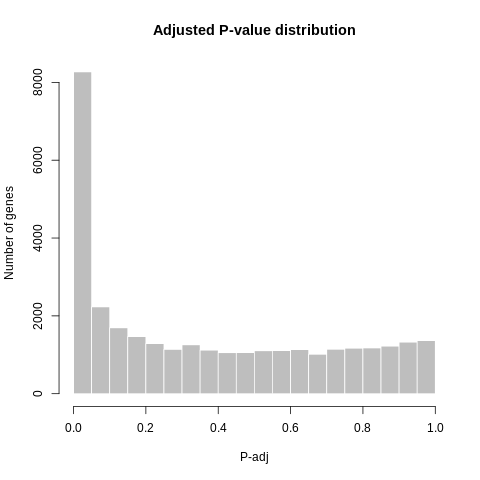

In [ ]:
%%R

tT2 <- topTable(fit2, adjust="fdr", sort.by="B", number=Inf)
hist(tT2$adj.P.Val, col = "grey", border = "white", xlab = "P-adj",
     ylab = "Number of genes", main = "Adjusted P-value distribution")

#### Q-Q plot for t-statistic

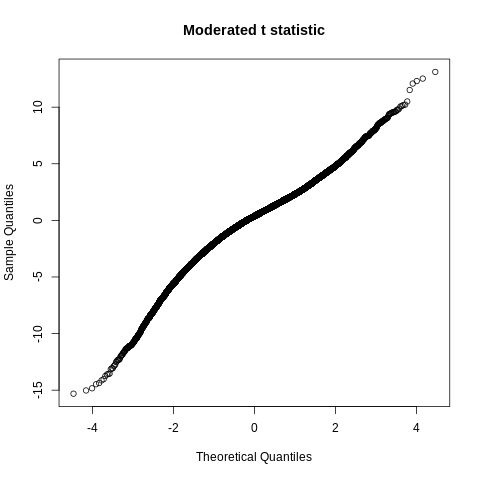

In [ ]:
%%R

t.good <- which(!is.na(fit2$F)) # filter out bad probes
qqt(fit2$t[t.good], fit2$df.total[t.good], main="Moderated t statistic")

#### Volcano Plot (log P-value vs log fold change)

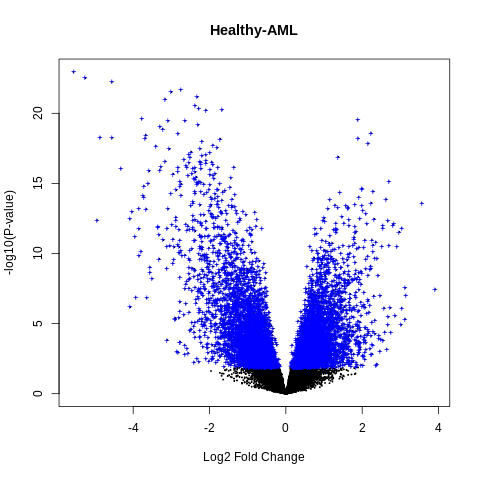

In [ ]:
%%R

# summarize test results as "up", "down" or "not expressed"
dT <- decideTests(fit2, adjust.method="fdr", p.value=0.05)

colnames(fit2) # list contrast names
ct <- 1        # choose contrast of interest
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
            highlight=length(which(dT[,ct]!=0)), names=rep('+', nrow(fit2)))

#### MD plot (log fold change vs mean log expression)

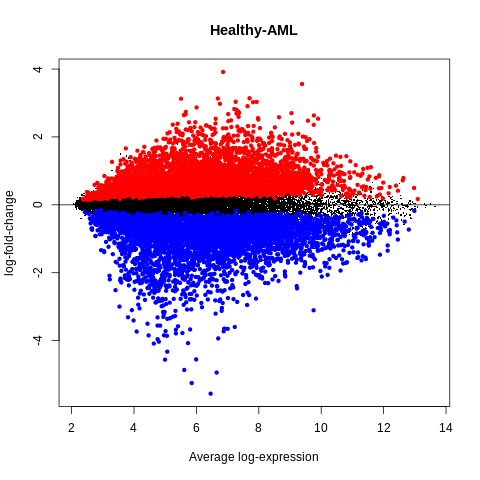

In [ ]:
%%R

# highlight statistically significant (p-adj < 0.05) probes
plotMD(fit2, column=ct, status=dT[,ct], legend=F, pch=20, cex=1)
abline(h=0)

#### Keeping a Subset of Columns

In [ ]:
%%R

# Only keep subset of columns needed for analysis
phenotypes_filtered <- dplyr::select(phenotypes, title, "phenotype:ch1", source_name_ch1, geo_accession)
features_filtered <- dplyr::select(features, ID, Gene.title, Gene.symbol)

expr_df <- data.frame(expr)

head(phenotypes_filtered)

                           title phenotype:ch1 source_name_ch1 geo_accession
GSM1180750 Primary AML sample 40      Leukemia     AML Patient    GSM1180750
GSM1180751 Primary AML sample 41      Leukemia     AML Patient    GSM1180751
GSM1180752 Primary AML sample 42      Leukemia     AML Patient    GSM1180752
GSM1180753 Primary AML sample 44      Leukemia     AML Patient    GSM1180753
GSM1180754  Primary AML sample 1      Leukemia     AML Patient    GSM1180754
GSM1180755  Primary AML sample 3      Leukemia     AML Patient    GSM1180755


In [ ]:
%%R

# Gather expression columns of expr_df and print structure of dat
data <- tidyr::gather(data = expr_df, key = geo_accession,
              value = expression, starts_with("GSM"))
head(data)

  geo_accession expression
1    GSM1180750   5.635547
2    GSM1180750   6.640414
3    GSM1180750   5.108161
4    GSM1180750   8.414047
5    GSM1180750   2.280691
6    GSM1180750   4.123770


#### Gathering Data

In [ ]:
%%R

data <- data.frame(expr) %>%
        gather(key = geo_accession, value = expression, starts_with("GSM")) %>%
        full_join(phenotypes, by = "geo_accession") %>%
        select(title, "phenotype:ch1", source_name_ch1, geo_accession, expression)
colnames(data) <- c("Title", "Phenotype", "SourceName", "Accession", "Expression")

head(data)

In [ ]:
%%R

normal <- dplyr::filter(data, Phenotype == "Normal")
patient <- dplyr::filter(data, SourceName == "AML Patient")

In [ ]:
%%R

pdf("boxplot.pdf", width=64)
boxplot(expr)
dev.off()

png 
  2 


### General Expression Data Analysis

#### Expression Value Distribution

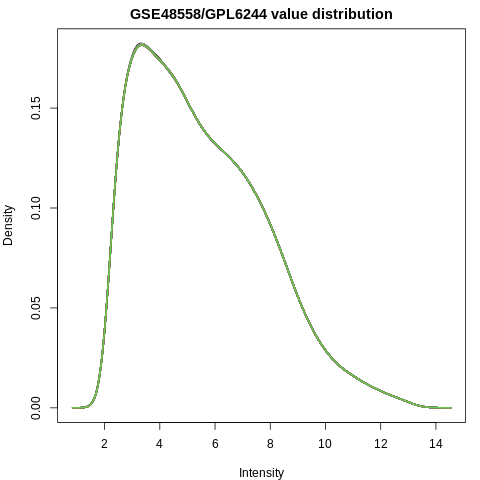

In [ ]:
%%R

par(mar=c(4,4,2,1))
title <- paste("GSE48558", "/", annotation(gds48558), " value distribution", sep ="")
plotDensities(expr, main=title, legend=F)

#### Mean Variance Trend
We eliminate rows with NAs.

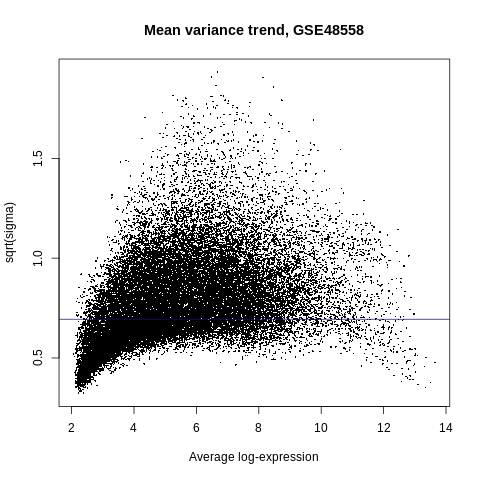

In [ ]:
%%R

expr <- na.omit(expr)
plotSA(fit2, main="Mean variance trend, GSE48558")

#### UMAP Plot (multi-dimensional scaling)
We remove duplicates from data.

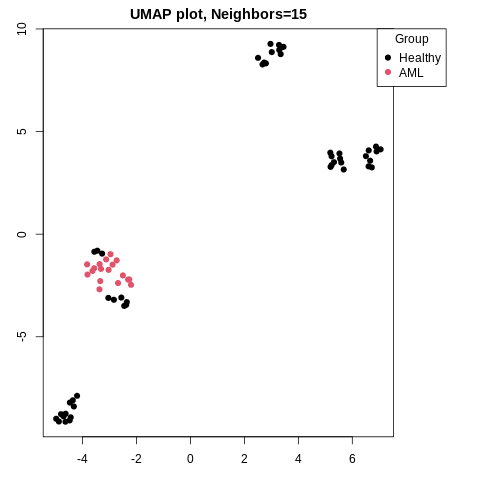

In [ ]:
%%R

expr <- expr[!duplicated(expr), ]  # remove duplicates
ump <- umap(t(expr), n_neighbors = 15, random_state = 123)
par(mar=c(3,3,2,6), xpd=TRUE)
plot(ump$layout, main="UMAP plot, Neighbors=15", xlab="", ylab="", col=gs, pch=20, cex=1.5)
legend("topright", inset=c(-0.15,0), legend=levels(gs), pch=20,
col=1:nlevels(gs), title="Group", pt.cex=1.5)
# pointLabel(ump$layout, labels = rownames(ump$layout), method="SANN", cex=0.6)

## 3. Dimensionality Reduction

### PCA

In [ ]:
# todo
%%R
pca <- prcomp(expr, center=TRUE, scale.=TRUE)
summary(pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     7.6458 1.57065 1.12017 1.00198 0.78282 0.61918 0.52199
Proportion of Variance 0.8725 0.03682 0.01873 0.01498 0.00915 0.00572 0.00407
Cumulative Proportion  0.8725 0.90933 0.92806 0.94304 0.95219 0.95791 0.96198
                          PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.4404 0.39553 0.37623 0.35232 0.31759 0.3058 0.27909
Proportion of Variance 0.0029 0.00233 0.00211 0.00185 0.00151 0.0014 0.00116
Cumulative Proportion  0.9649 0.96721 0.96932 0.97117 0.97268 0.9741 0.97523
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.27612 0.26947 0.26452 0.25317 0.24683 0.23961 0.23592
Proportion of Variance 0.00114 0.00108 0.00104 0.00096 0.00091 0.00086 0.00083
Cumulative Proportion  0.97637 0.97746 0.97850 0.97946 0.98037 0.98122 0.98205
                          PC22    PC23

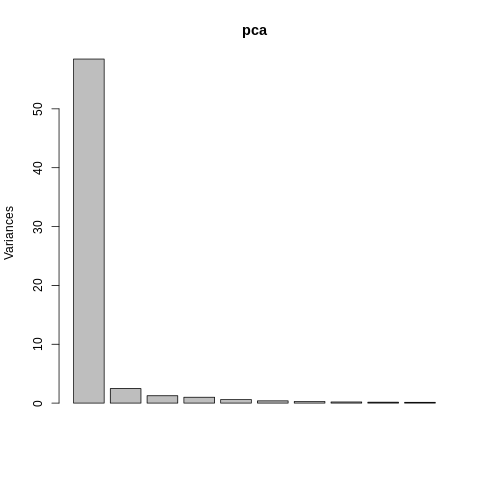

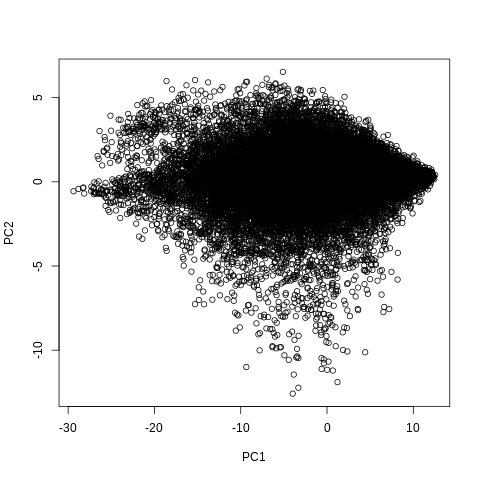

In [ ]:
%%R
plot(pca)
plot(pca$x[, 1:2])

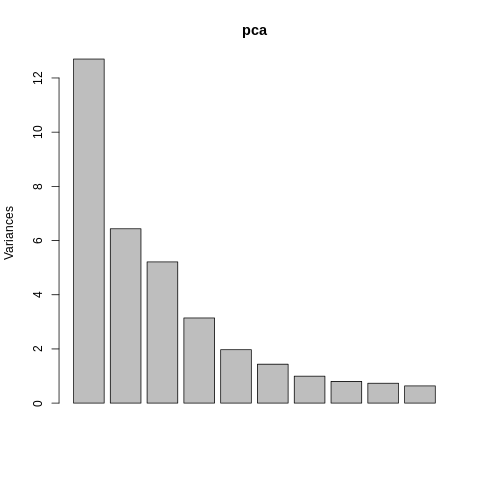

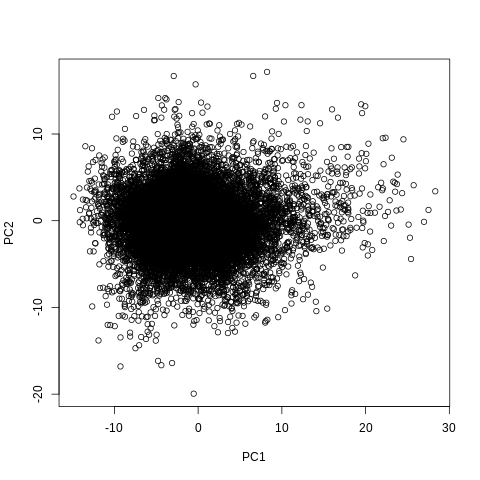

In [ ]:
%%R

expr.scale = t(scale(t(expr), scale = F))
pca <- prcomp(expr.scale)
plot(pca)
plot(pca$x[, 1:2])

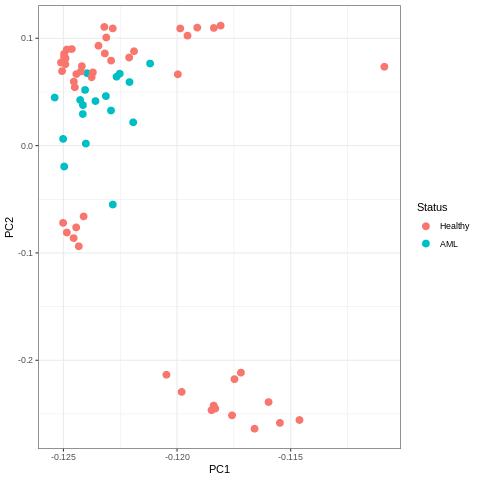

In [ ]:
%%R

pcar <- data.frame(pca$r[, 1:3], Status = gds48558$group)

ggplot(pcar, aes(PC1, PC2, color = Status)) + geom_point(size = 3) + theme_bw()
# ggsave("pca_samples.pdf")

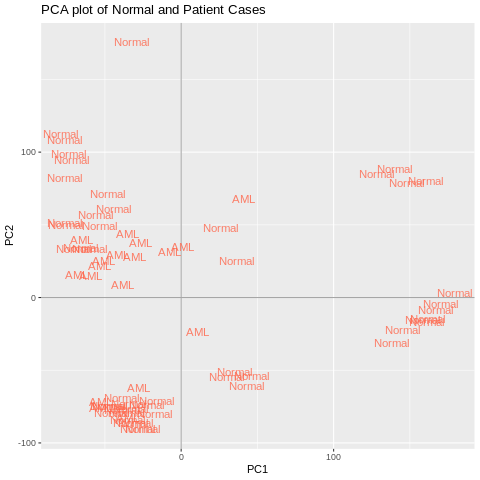

In [ ]:
%%R

# ggbiplot(pca)

scores = as.data.frame(prcomp(t(expr), center=TRUE, scale.=TRUE)$x)

ggplot(data = scores, aes(x = PC1, y = PC2, label = gds48558$group)) +
  geom_hline(yintercept = 0, colour = "gray65") +
  geom_vline(xintercept = 0, colour = "gray65") +
  geom_text(colour = "tomato", alpha = 0.8, size = 4) +
  ggtitle("PCA plot of Normal and Patient Cases")

### TSNE




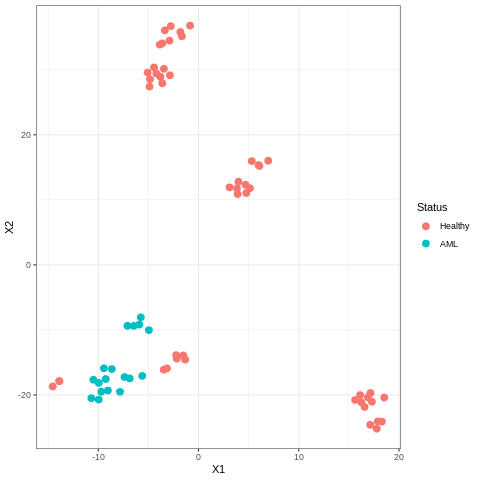

In [ ]:
%%R

set.seed(100)
tsne_results <- Rtsne(t(expr), perplexity=8, check_duplicates = T,dim=2) # You can change the value of perplexity and see how the plot changes

## Generate the t_SNE plot
tcar <- data.frame(tsne_results$Y, Status = gds48558$group)

ggplot(tcar, aes(X1, X2, color = Status)) + geom_point(size = 3) + theme_bw()

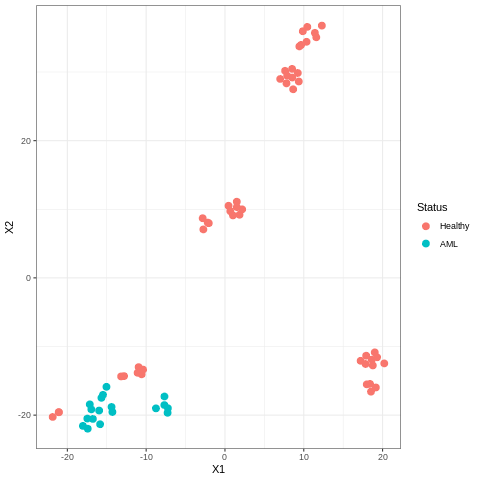

In [ ]:
%%R
expr.scale = t(scale(t(expr), scale = F))
set.seed(100)
tsne_results <- Rtsne(t(expr.scale), perplexity=8, check_duplicates = T,dim=2) # You can change the value of perplexity and see how the plot changes

## Generate the t_SNE plot
tcar <- data.frame(tsne_results$Y, Status = gds48558$group)

ggplot(tcar, aes(X1, X2, color = Status)) + geom_point(size = 3) + theme_bw()

### LDA


In [ ]:
%%R
r = matrix(expr[1:1000,1:10],nrow=10, ncol=1000)

In [ ]:
%%R
labels = gds48558$group
data <- data.frame(r, labels = labels[1:10])
data$labels

 [1] AML AML AML AML AML AML AML AML AML AML
Levels: Healthy AML


In [ ]:
%%R
dim(data)

[1]   10 1001


In [ ]:
%%R
linear <- lda(labels~., data)
linear


Error in svd(X, nu = 0L) : infinite or missing values in 'x'


RInterpreterError: ignored

### MDS


In [ ]:
%%R
# expr.scale = t(scale(t(expr), scale = F))
set.seed(100)
fit <- cmdscale(dist(t(expr)), eig = T, k = 2)
x <- fit$points[, 1]
y <- fit$points[, 2]
# mds = mds(delta = t(expr),ndim = 2, type = "ratio" )

## Generate the t_SNE plot
mcar <- data.frame(X1=x,X2=y, Status = gds48558$group)

ggplot(mcar, aes(X1, X2, color = Status)) + geom_point(size = 3) + theme_bw()



In [ ]:
%%R
# expr.scale = t(scale(t(expr), scale = F))
set.seed(100)
fit <- cmdscale(dist(t(expr)), eig = T, k = 2)
x <- fit$points[, 1]
y <- fit$points[, 2]
# mds = mds(delta = t(expr),ndim = 2, type = "ratio" )

## Generate the t_SNE plot
mcar <- data.frame(X1=x,X2=y, Status = gds48558$group)

ggplot(mcar, aes(X1, X2, color = Status)) + geom_point(size = 3) + theme_bw()



initial  value 29.793213 
final  value 29.789946 
converged


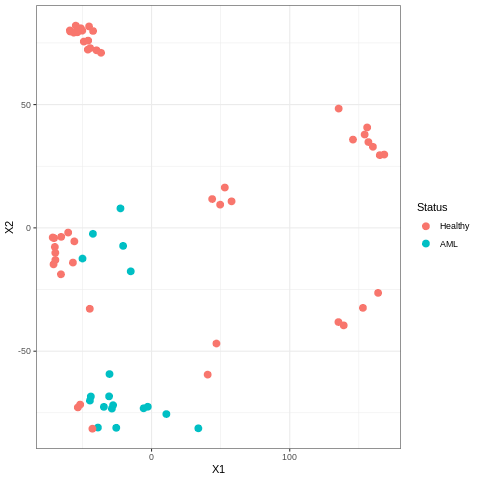

In [ ]:
%%R
# expr.scale = t(scale(t(expr), scale = F))
set.seed(100)
fit <- isoMDS(dist(t(expr)), k = 2)
x <- fit$points[, 1]
y <- fit$points[, 2]
# mds = mds(delta = t(expr),ndim = 2, type = "ratio" )

## Generate the t_SNE plot
tcar <- data.frame(X1=x,X2=y, Status = gds48558$group)

ggplot(tcar, aes(X1, X2, color = Status)) + geom_point(size = 3) + theme_bw()



In [ ]:
%%R
mds

## 4. Correlation

### Correlation between all samples

In [ ]:
%%R

pheatmap(cor(expr), filename="CorHeatmap.pdf", labels_row = status, labels_col = status, width = 16, height = 16, borderColor= NA)

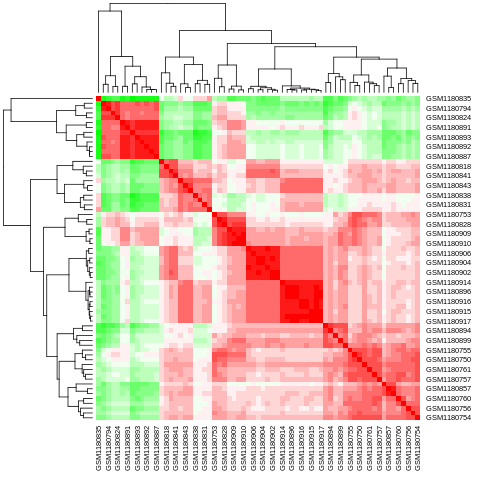

In [ ]:

res <- cor(expr_df)
# corrplot(res)
palette <- colorRampPalette(c("green", "white", "red")) (20)
heatmap(x = res, col=palette, symm=TRUE)

### Correlation by source name

In [ ]:
%%R

data_s <- dplyr::select(phenotypes, geo_accession, "phenotype:ch1", source_name_ch1)
colnames(data_s) <- c("Accession", "Phenotype", "SourceName")
data_s <- data.frame(data_s, Status = gds48558$group)[order(data_s$SourceName),]
data_s

            Accession Phenotype   SourceName  Status
GSM1180750 GSM1180750  Leukemia  AML Patient     AML
GSM1180751 GSM1180751  Leukemia  AML Patient     AML
GSM1180752 GSM1180752  Leukemia  AML Patient     AML
GSM1180753 GSM1180753  Leukemia  AML Patient     AML
GSM1180754 GSM1180754  Leukemia  AML Patient     AML
GSM1180755 GSM1180755  Leukemia  AML Patient     AML
GSM1180756 GSM1180756  Leukemia  AML Patient     AML
GSM1180757 GSM1180757  Leukemia  AML Patient     AML
GSM1180758 GSM1180758  Leukemia  AML Patient     AML
GSM1180759 GSM1180759  Leukemia  AML Patient     AML
GSM1180760 GSM1180760  Leukemia  AML Patient     AML
GSM1180761 GSM1180761  Leukemia  AML Patient     AML
GSM1180762 GSM1180762  Leukemia  AML Patient     AML
GSM1180894 GSM1180894  Leukemia  AML Patient     AML
GSM1180895 GSM1180895  Leukemia  AML Patient     AML
GSM1180897 GSM1180897  Leukemia  AML Patient     AML
GSM1180898 GSM1180898  Leukemia  AML Patient     AML
GSM1180899 GSM1180899  Leukemia  AML Patient  

In [ ]:
%%R

pheatmap(cor(expr), filename='SourceName-Cor-Heatmap.pdf', labels_row = data_s$SourceName, labels_col = data_s$SourceName, width = 16, height = 16, borderColor= NA)